**TASK 4 - SPAM EMAIL DETECTION BY MACHINE LEARNING(CIPHERBYTE)**

**BY URNISHA SARKAR**

**Importing The Important Libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

**Importing The Spam Email Detection Dataset**

In [2]:
from google.colab import files
data=files.upload()

Saving Spam Email Detection - spam.csv to Spam Email Detection - spam.csv


In [3]:
df=pd.read_csv("Spam Email Detection - spam.csv")

**DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

**Checking The First 5 Rows**

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Checking The First 20 Rows**

In [7]:
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


**Checking The Last 5 rows**

In [8]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Checking The Last 20 Rows**

In [9]:
df.tail(20)

,v1,v2
5552,ham,Have a safe trip to Nigeria. Wish you happines...
5553,ham,Hahaha..use your brain dear
5554,ham,Well keep in mind I've only got enough gas for...
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...
5556,ham,Yes i have. So that's why u texted. Pshew...mi...
5557,ham,No. I meant the calculation is the same. That ...
5558,ham,"Sorry, I'll call later"
5559,ham,if you aren't here in the next &lt;#&gt; hou...
5560,ham,Anything lor. Juz both of us lor.
5561,ham,Get me out of this dump heap. My mom decided t...


In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.rename(columns={'v1':'Target','v2':'Message'},inplace=True)

In [12]:
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Obtain The Number Of Rows and Columns**

In [13]:
df.shape

(5572, 2)

In [14]:
df.dtypes

Target     object
Message    object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Target   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Statistical Measures Of the Dataset**

In [16]:
df.describe()


,Target,Message
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [18]:
df.duplicated().sum()

409

**Removing Duplicated Values**

In [19]:
df = df.drop_duplicates(keep='first')


In [20]:
df.duplicated().sum()

0

**Finding Out Co-Relation**

In [21]:
corr=df.corr()
corr

<ipython-input-21-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


""


In [22]:
encoder = LabelEncoder()

In [23]:
df['Target'] = encoder.fit_transform(df['Target'])

<ipython-input-23-7ac88b6c6ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = encoder.fit_transform(df['Target'])


**HAM - 0**

**SPAM - 1**

In [24]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['Target'].value_counts()

0    4516
1     647
Name: Target, dtype: int64

In [26]:
!pip install nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Calculating The Number Of Characters**

In [28]:
df['No_Of_Characters'] = df['Message'].apply(len)

<ipython-input-28-48b7ba540b1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Of_Characters'] = df['Message'].apply(len)


In [29]:
df.head()

,Target,Message,No_Of_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Calculating The Number Of Words**

In [30]:
df['No_Of_Words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-30-bb63cce36c43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Of_Words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,Target,Message,No_Of_Characters,No_Of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


**Calculating The Number Of Sentences**

In [32]:
df['No_Of_Sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-32-92703e6113ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Of_Sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,Target,Message,No_Of_Characters,No_Of_Words,No_Of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[df['Target'] == 0][['No_Of_Characters','No_Of_Words','No_Of_Sentences']].describe() #ham

,No_Of_Characters,No_Of_Words,No_Of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['Target'] == 1][['No_Of_Characters','No_Of_Words','No_Of_Sentences']].describe() #spam

,No_Of_Characters,No_Of_Words,No_Of_Sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


**DATA VISUALISATION**

**Histplot Graph**

<Axes: xlabel='No_Of_Characters', ylabel='Count'>

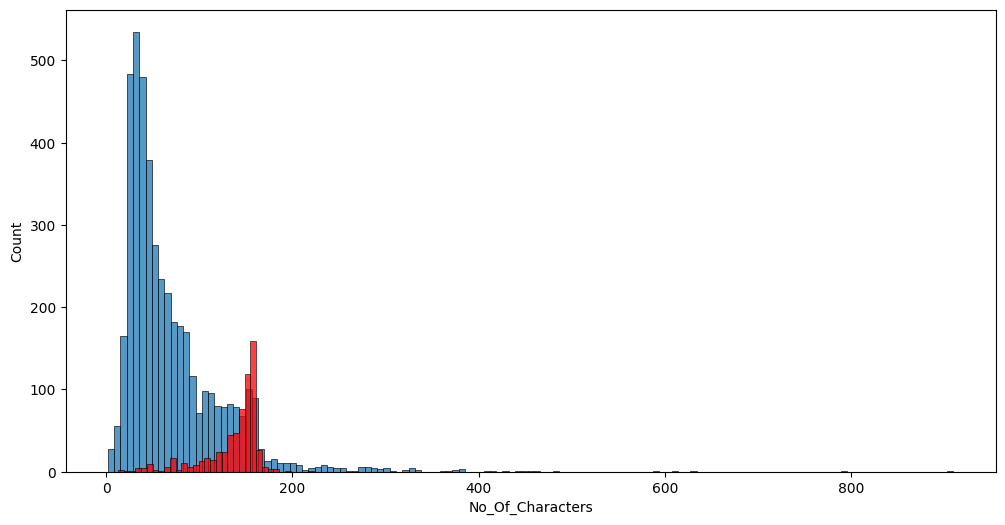

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['No_Of_Characters'])
sns.histplot(df[df['Target'] == 1]['No_Of_Characters'],color='red')

<Axes: xlabel='No_Of_Words', ylabel='Count'>

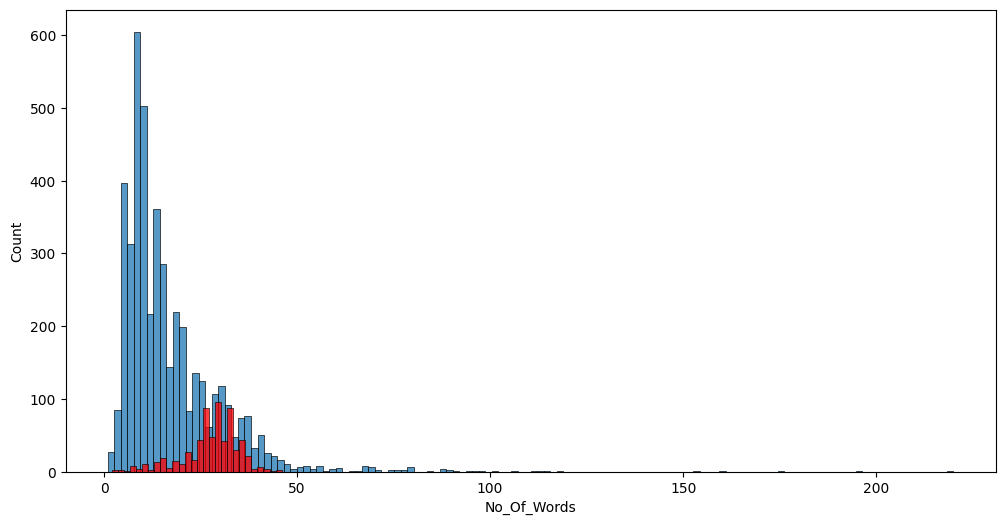

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['No_Of_Words'])
sns.histplot(df[df['Target'] == 1]['No_Of_Words'],color='red')

<Axes: xlabel='No_Of_Sentences', ylabel='Count'>

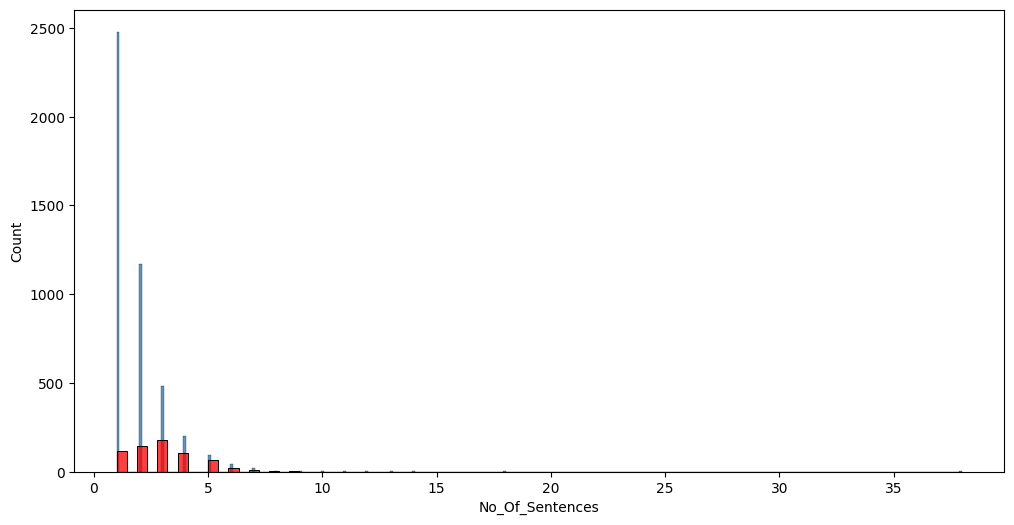

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['No_Of_Sentences'])
sns.histplot(df[df['Target'] == 1]['No_Of_Sentences'],color='red')

**Pair Plot**

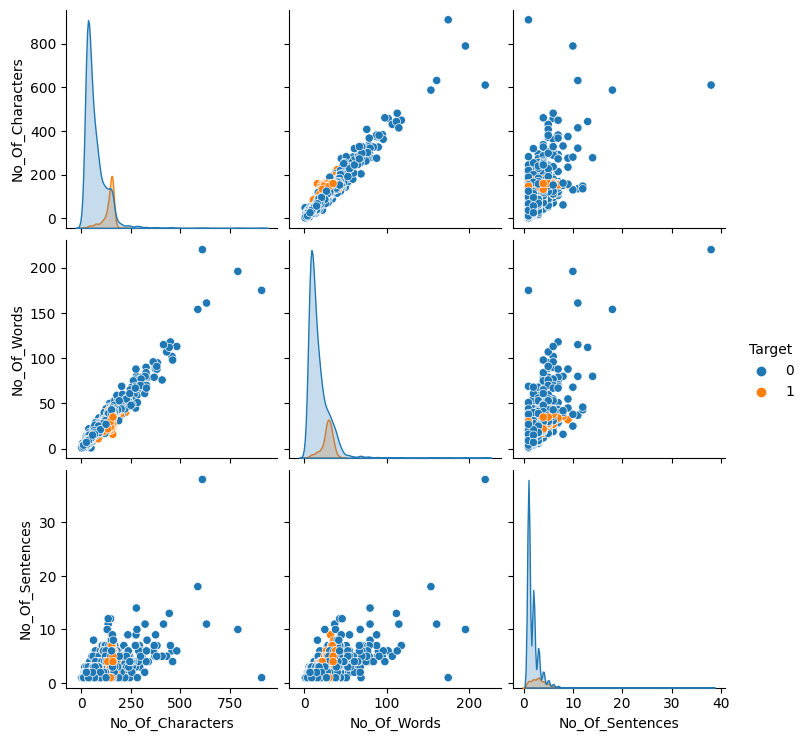

In [39]:
sns.pairplot(df,hue='Target')

**Heat Map**

<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

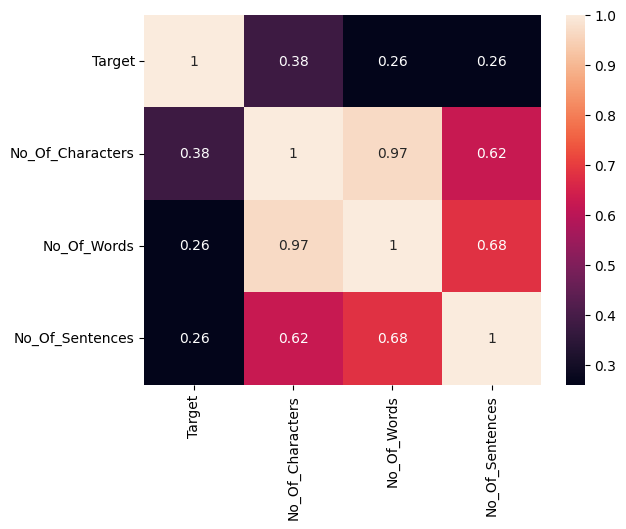

In [40]:
sns.heatmap(df.corr(),annot=True)

**Distribution Plot**

<ipython-input-41-6701c8f4e8f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'])


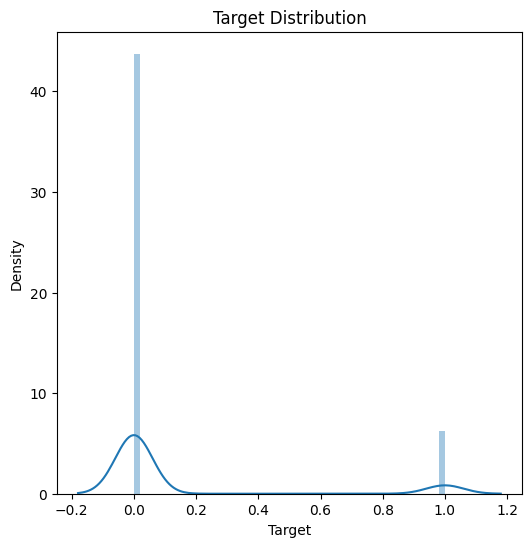

In [41]:
plt.figure(figsize=(6,6))
sns.distplot(df['Target'])
plt.title('Target Distribution')
plt.show()

**Pie - Chart**

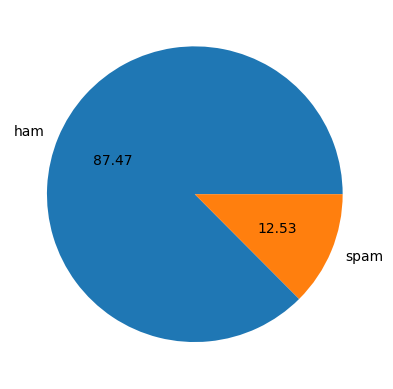

In [42]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

**MODEL BUILDING**

In [43]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df['Message']).toarray()

In [45]:
X.shape

(5163, 3000)

In [46]:
y = df['Target'].values

**TRAIN-TEST SPLIT**

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
print(X_train.shape)

(4130, 3000)


In [49]:
print(X_test.shape)

(1033, 3000)


**LOGISTIC REGRESSION**

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [53]:
prediction_on_training_data

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
accuracy_on_training_data

0.974818401937046

In [55]:
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [56]:
prediction_on_test_data

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
accuracy_on_test_data

0.9651500484027106

**GAUSSIAN NAIVE BAYES**

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred1))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred1))
print("Precision Score :",precision_score(y_test,y_pred1))

Accuracy Score : 0.8799612778315585
Confusion Matrix : [[802 110]
 [ 14 107]]
Precision Score : 0.4930875576036866


**MULTINOMIAL NAIVE BAYES**

In [60]:
mnb = MultinomialNB()

In [61]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred2))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred2))
print("Precision Score :",precision_score(y_test,y_pred2))

Accuracy Score : 0.9738625363020329
Confusion Matrix : [[911   1]
 [ 26  95]]
Precision Score : 0.9895833333333334


**BERNOULLI NAIVE BAYES**

In [62]:
bnb = BernoulliNB()

In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred3))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred3))
print("Precision Score :",precision_score(y_test,y_pred3))

Accuracy Score : 0.9864472410454985
Confusion Matrix : [[910   2]
 [ 12 109]]
Precision Score : 0.9819819819819819


**BUILDING A PREDICTIVE SYSTEM**

In [64]:
input_df = ["I've been trying to think of the perfect way to express my gratitude for this break. I swear that I won't take your assistance for granted and that I'll keep my word. You have always been nice and a blessing."]

In [65]:
input_df_features = tfidf.transform(input_df)

In [66]:
prediction = model.predict(input_df_features)
print(prediction)
if (prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[0]
Ham mail
